# **1. Prepare the environment**

## **1.1 Manage file(s) source**
---

## **1.1.1 Option 1: use your local files and upload them to the notebook**
---

### **Upload raw/images (not the labels)**
---

In [ ]:
#@markdown ##Play the cell to upload local files
from google.colab import files
!mkdir -p /content/data/train/x 
%cd /content/data/train/x
uploaded = files.upload()
%cd /content

/content/data/train/x


Saving cyst 4d fil 3well Pha,bcat,dapi 02.08.19 40x Z5 13a.tif to cyst 4d fil 3well Pha,bcat,dapi 02.08.19 40x Z5 13a.tif
Saving cyst 4d fil 3well Pha,bcat,dapi 02.08.19 40x Z5 14a.tif to cyst 4d fil 3well Pha,bcat,dapi 02.08.19 40x Z5 14a.tif
/content


### **Upload labels (not the raw)**
---

In [ ]:
#@markdown ##Play the cell to upload local files
from google.colab import files
!mkdir -p /content/data/train/y
%cd /content/data/train/y
uploaded = files.upload()
%cd /content

/content/data/train/y


Saving cyst 4d fil 3well Pha,bcat,dapi 02.08.19 40x Z5 13a.tif to cyst 4d fil 3well Pha,bcat,dapi 02.08.19 40x Z5 13a.tif
Saving cyst 4d fil 3well Pha,bcat,dapi 02.08.19 40x Z5 14a.tif to cyst 4d fil 3well Pha,bcat,dapi 02.08.19 40x Z5 14a.tif
/content


### **Upload test images**
---

In [ ]:
#@markdown ##Play the cell to upload local files
from google.colab import files
!mkdir -p /content/data/test/x
%cd /content/data/test/x
uploaded = files.upload()
%cd /content

/content/data/test/x


Saving cyst 4d fil 3well Pha,bcat,dapi 02.08.19 40x Z5 13a.tif to cyst 4d fil 3well Pha,bcat,dapi 02.08.19 40x Z5 13a.tif
/content


## **1.1.2 Option 2: mount your Google Drive**
---
<font size = 4> To use this notebook on the data present in your Google Drive, you need to mount your Google Drive to this notebook.

<font size = 4> Play the cell below to mount your Google Drive and follow the link. In the new browser window, select your drive and select 'Allow', copy the code, paste into the cell and press enter. This will give Colab access to the data on the drive. 

<font size = 4> Once this is done, your data are available in the **Files** tab on the top left of notebook.

In [ ]:
#@markdown ##Play the cell to connect your Google Drive to Colab

#@markdown * Click on the URL. 

#@markdown * Sign in your Google Account. 

#@markdown * Copy the authorization code. 

#@markdown * Enter the authorization code. 

#@markdown * Click on "Files" site on the right. Refresh the site. Your Google Drive folder should now be available here as "drive". 

# mount user's Google Drive to Google Colab.
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive



## **1.1. Check for GPU access**
---

By default, the session should be using Python 3 and GPU acceleration, but it is possible to ensure that these are set properly by doing the following:

<font size = 4>Go to **Runtime -> Change the Runtime type**

<font size = 4>**Runtime type: Python 3** *(Python 3 is programming language in which this program is written)*

<font size = 4>**Accelerator: GPU** *(Graphics processing unit)*

## **2. Data pre-processing**


## **2.1. Paths to store/load images**
---

In [7]:
#@markdown ##### **If option 1 used above define paths as '/content/data/train/x', '/content/data/train/y', '/content/data/test/x' and '/content/out' respectively, as you did not mount the Google Drive folder and may be using Colab disk space. Ensure also to donwload the results from the '/content/out' folder later!**

#@markdown 

#@markdown #####Path to images
train_path_img = '/content/data/train/x' #@param {type:"string"}

#@markdown #####Path to labels
train_path_labels = '/content/data/train/y' #@param {type:"string"}

#@markdown #####Path to test images
test_path_img = '/content/data/test/x' #@param {type:"string"}

#@markdown #####Path to store the resulting images (it'll be created if not existing):
output_path = '/content/out' #@param {type:"string"}

#@markdown #####Check if you need to retrain the network (loading previous weigths). False to not train, only test :
train_model = True #@param {type:"boolean"}

## **2.2. Visualize some images**
---

     |████████████████████████████████| 31.0 MB 1.7 MB/s 


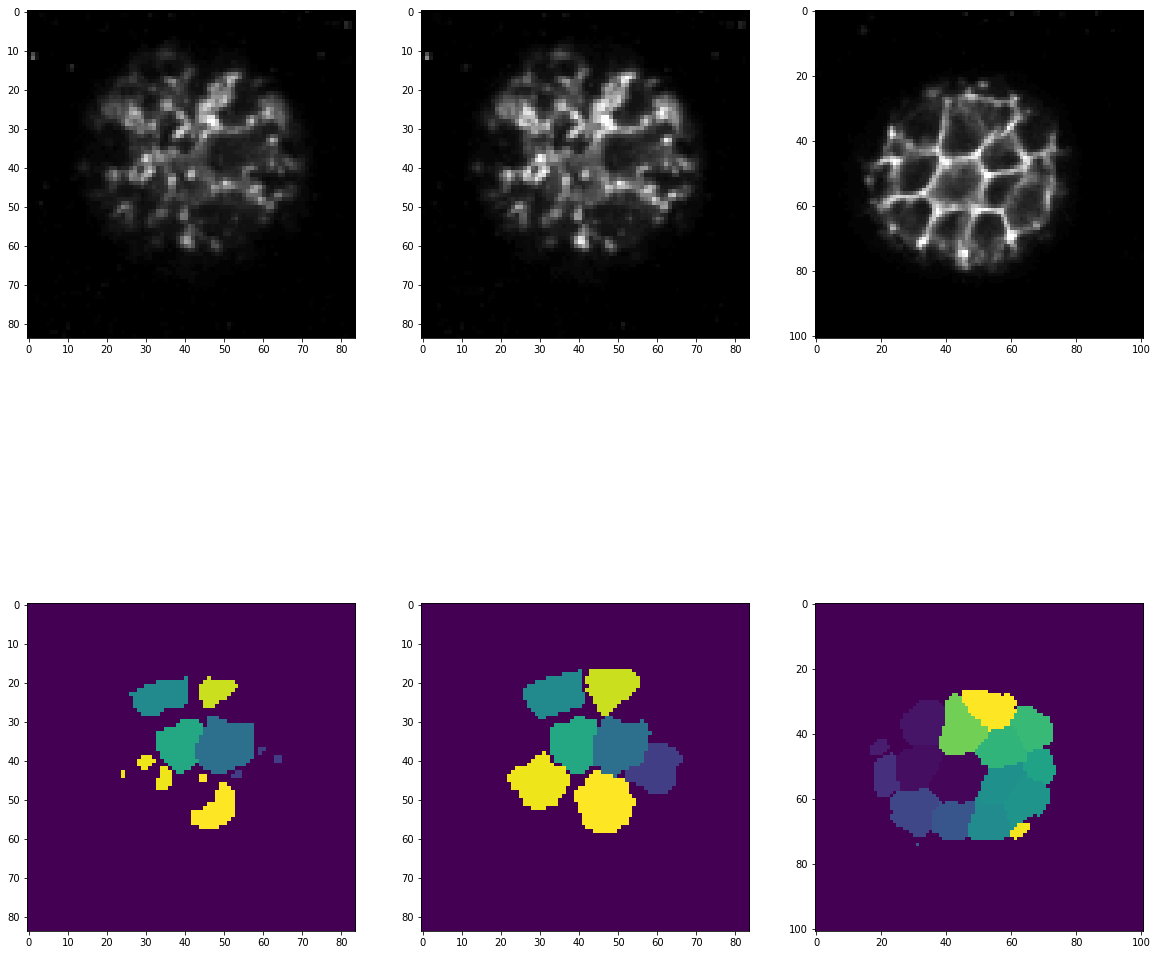

In [ ]:
#@markdown ##Play to adapt images
!pip install imagecodecs
import os
import sys
import numpy as np
from tqdm.notebook import tqdm
from skimage.io import imread
from skimage.exposure import match_histograms                                                                           

# Show a few examples to heck that they have been stored correctly 
%matplotlib inline
from numpy.random import randint, seed
from matplotlib import pyplot as plt

# Checks
if not os.path.exists(train_path_img):
    raise ValueError("Defined path not found: {}. Please define 'data_path' path correctly above".format(data_path))

ids = sorted(next(os.walk(train_path_img))[2])
seed(1)
values = randint(0, len(ids), 3)

slices = []
test1_sample = imread(os.path.join(train_path_img, ids[values[0]])) 
slices.append(randint(0, len(test1_sample), 1)[0])
test2_sample = imread(os.path.join(train_path_img, ids[values[1]])) 
slices.append(randint(0, len(test2_sample), 1)[0])
test3_sample = imread(os.path.join(train_path_img, ids[values[2]])) 
slices.append(randint(0, len(test3_sample), 1)[0])

test1_sample_mask = imread(os.path.join(train_path_labels, ids[values[0]])) 
test2_sample_mask = imread(os.path.join(train_path_labels, ids[values[1]])) 
test3_sample_mask = imread(os.path.join(train_path_labels, ids[values[2]])) 

plt.figure(figsize=(20,20))
plt.subplot(2, 3, 1)    
plt.imshow(test1_sample[slices[0]], cmap='gray')
plt.subplot(2, 3, 2)    
plt.imshow(test2_sample[slices[1]], cmap='gray')
plt.subplot(2, 3, 3)    
plt.imshow(test3_sample[slices[2]], cmap='gray')
plt.subplot(2, 3, 4)    
plt.imshow(test1_sample_mask[slices[0]])
plt.subplot(2, 3, 5)    
plt.imshow(test2_sample_mask[slices[1]])
plt.subplot(2, 3, 6)    
plt.imshow(test3_sample_mask[slices[2]])
plt.show()

#del test1_sample, test2_sample, test3_sample


# **3. Run the code to get the results**


In [10]:
#@markdown ##Play to pass images through the model
!pip install imagecodecs
import os
import sys
import numpy as np
from tqdm.notebook import tqdm
from skimage.io import imread
from skimage.exposure import match_histograms                                                                           

# Show a few examples to heck that they have been stored correctly 
%matplotlib inline
from numpy.random import randint, seed
from matplotlib import pyplot as plt

job_name = "resunet_3d_instances"

%cd /content/
# Download .yaml file and model weights 
if train_model:
    !gdown --id 12TScU2kf-KRD79CJgeG-ElNTP7rwA713
    !mv /content/train_resunet_3d_instances.yaml /content/resunet_3d_instances.yaml
else:
    !gdown --id 1nvlIxL4qzrIUJJic8nXlKXMZiEQK1RYz
!gdown --id 1rBWukgdOMBS9BQXFpckbnfunaJ_Gnuwl

# Modify template according to defined variable paths
import fileinput

for line in fileinput.input("/content/"+str(job_name)+".yaml", inplace=True):
    if 'edit_test_path_here' in line:
        print('        PATH: {}'.format(test_path_img)) 
    else:
        print('{}'.format(line), end='')

for line in fileinput.input("/content/"+str(job_name)+".yaml", inplace=True):
    if 'edit_train_path_here' in line:
        print('        PATH: {}'.format(train_path_img)) 
    else:
        print('{}'.format(line), end='')

for line in fileinput.input("/content/"+str(job_name)+".yaml", inplace=True):
    if 'edit_train_mask_path_here' in line:
        print('        MASK_PATH: {}'.format(train_path_labels)) 
    else:
        print('{}'.format(line), end='')

# Clone the repo 
if not os.path.exists('/content/EM_Image_Segmentation'):
    !git clone https://github.com/danifranco/EM_Image_Segmentation.git
    # Install dependencies 
    !pip install git+https://github.com/aleju/imgaug.git
    !pip install numpy_indexed yacs
    !pip install --upgrade --no-cache-dir gdown
    !pip install imagecodecs

# Run the code 
%cd '/content/EM_Image_Segmentation'
!pip install imagecodecs
!python -u main.py --config {'/content/'+job_name+'.yaml'} --result_dir {output_path} --dataroot {train_path_img} --name {job_name} --run_id 1 --gpu 0



/content
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=12TScU2kf-KRD79CJgeG-ElNTP7rwA713
To: /content/train_resunet_3d_instances.yaml
100% 1.27k/1.27k [00:00<00:00, 2.21MB/s]
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1rBWukgdOMBS9BQXFpckbnfunaJ_Gnuwl
To: /content/model_weights_resunet_3d_instances_1.h5
100% 8.37M/8.37M [00:00<00:00, 149MB/s]
/content/EM_Image_Segmentation
Date: 2022-05-16 13:14:17
Arguments: Namespace(config='/content/resunet_3d_instances.yaml', dataroot='/content/data/train/x', gpu='0', name='resunet_3d_instances

In [ ]:
from google.colab import files
result_dir = os.path.join(output_path, str(job_name)+'/results/'+str(job_name)+'_1/per_image_instances')
files.download(result_dir)

# **4. Visualize results**


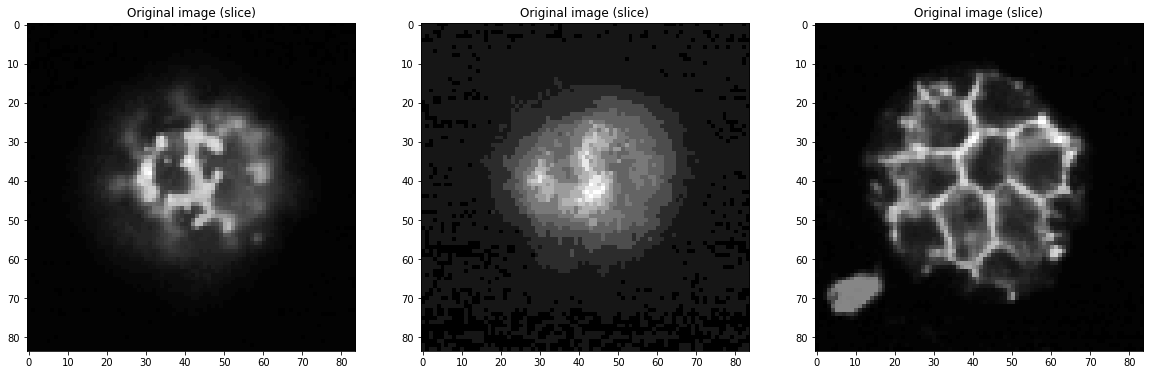

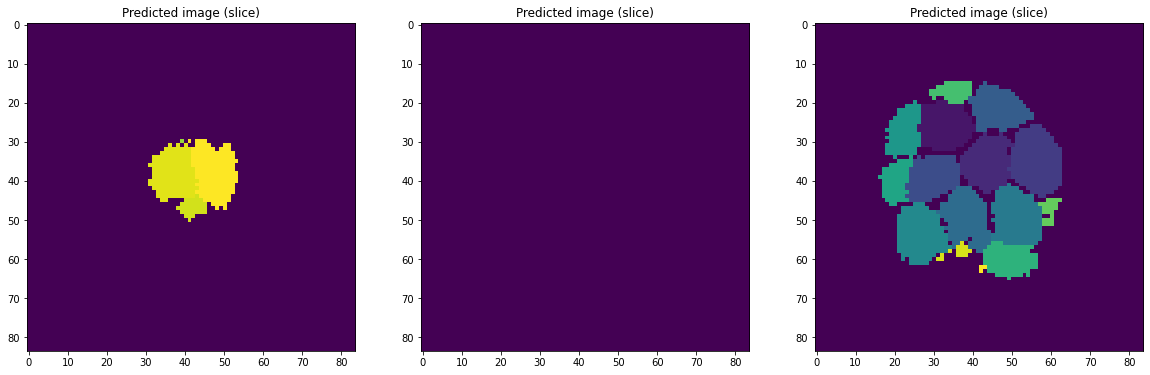

In [ ]:
result_dir = os.path.join(output_path, str(job_name)+'/results/'+str(job_name)+'_1/per_image_instances')

# Show a few examples to check that they have been stored correctly 
%matplotlib inline
from numpy.random import randint, seed
from matplotlib import pyplot as plt

ids = sorted(next(os.walk(result_dir))[2])
choosen_images = randint(0, len(ids), 3)
seed(1)

test_samples = []
test_sample_preds = []

aux = imread(os.path.join(test_path_img, ids[choosen_images[0]]))
sl = randint(0, len(aux), 1)[0]
test_samples.append(aux[sl])
test_sample_preds.append(imread(os.path.join(result_dir, ids[choosen_images[0]]))[sl])
aux = imread(os.path.join(test_path_img, ids[choosen_images[1]]))
sl = randint(0, len(aux), 1)[0]
test_samples.append(aux[sl])
test_sample_preds.append(imread(os.path.join(result_dir, ids[choosen_images[1]]))[sl])
aux = imread(os.path.join(test_path_img, ids[choosen_images[2]]))
sl = randint(0, len(aux), 1)[0]
test_samples.append(aux[sl])
test_sample_preds.append(imread(os.path.join(result_dir, ids[choosen_images[2]]))[sl])

# Show predicted images
for i in range(2):
    plt.figure(figsize=(20,20))
    for j in range(3):
        plt.subplot(i+1, 3, j+1)
        if i == 0:
            plt.title("Original image (slice)")
            plt.imshow(test_samples[j], cmap='gray')            
        else:
            plt.title("Predicted image (slice)")
            plt.imshow(test_sample_preds[j])
    plt.show()

final = os.path.join(output_path, 'RESULTS')
!mkdir {final}
!mv {result_dir} {final}